# Bitcoin Price Prediction using Machine Learning in Python
**Introduction:**

Bitcoin price prediction has garnered significant attention due to its volatile nature and the potential for lucrative trading opportunities. With the rise of machine learning (ML), predicting market trends has become increasingly feasible. This project explores how ML can be utilized to predict Bitcoin's price movement, specifically whether a trade will result in a profitable outcome. By leveraging various ML models, such as Logistic Regression, Support Vector Machines (SVM), and XGBoost, we aim to analyze Bitcoin price data to forecast future trends.

We begin by loading and exploring Bitcoin price data, focusing on OHLC (Open, High, Low, Close) values from 2014 to 2022. Next, we perform feature engineering, introducing variables such as "open-close" and "low-high" to better understand market behavior. With preprocessed data, we train multiple ML models to predict the market's direction. The model's performance is evaluated using metrics like ROC-AUC, offering insights into the effectiveness of different algorithms in predicting Bitcoin price movements.

**Implementation**

**Step 1: Importing Libraries**

Python libraries make it very easy for us to handle the data and perform typical and complex tasks with a single line of code.

**Pandas –** This library helps to load the data frame in a 2D array format and has multiple functions to perform analysis tasks in one go.

**Numpy –** Numpy arrays are very fast and can perform large computations in a very short time.

**Matplotlib/Seaborn –** This library is used to draw visualizations.

**Sklearn –** This module contains multiple libraries having pre-implemented functions to perform tasks from data preprocessing to model development and evaluation.

**XGBoost –** This contains the eXtreme Gradient Boosting machine learning algorithm which is one of the algorithms which helps us to achieve high accuracy on predictions.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')


**Step 2: Loading and Exploring Data**







*   The dataset we will use here to perform the analysis and build a predictive model is Bitcoin Price data. We will use OHLC(‘Open’, ‘High’, ‘Low’, ‘Close’) data from 17th July 2014 to 29th December 2022 which is for 8 years for the Bitcoin price.
*  The code reads a CSV file named `bitcoin.csv` into a DataFrame `df`, then `df.head()` displays the first 5 rows of the DataFrame to give a quick view of the data.





In [ ]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100




*    The `df.shape` attribute in Pandas returns a tuple representing a DataFrame's dimensions: `(rows, columns)`. `df.shape[0]` gives the number of rows, and `df.shape[1]` gives the number of columns.



In [ ]:
df.shape

(2713, 7)



*  The `df.describe()` function in Pandas provides summary statistics for numerical columns in the DataFrame, including count, mean, standard deviation, min, max, and quartiles.



In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11




*  The `df.info()` function in Pandas provides a concise summary of the DataFrame, including the number of non-null entries, data types, and memory usage for each column.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB




*   **Exploratory Data Analysis(EDA)** is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
While performing the EDA of the Bitcoin Price data we will analyze how prices of the cryptocurrency have moved over the period of time and how the end of the quarters affects the prices of the currency.
*  `plt.figure(figsize=(15, 5))`: Sets the plot size to 15 inches wide and 5 inches tall.


*   `plt.plot(df['Close'])`: Plots the 'Close' column of the DataFrame.

*   `plt.title('Bitcoin Close price.', fontsize=15)`: Adds a title to the plot with font size 15.
*  `plt.ylabel('Price in dollars.')`: Labels the y-axis as "Price in dollars."


*   `plt.show()`: Displays the plot.



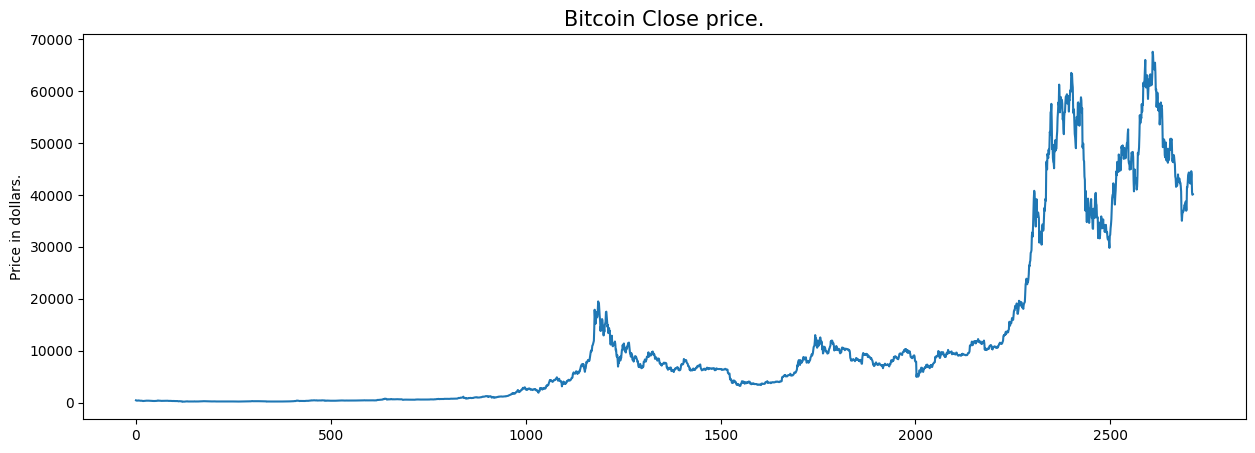

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()



*   `df[df['Close'] == df['Adj Close']].shape:` The shape of rows where 'Close' equals 'Adj Close'.
*   `df.shape:` The shape of the entire DataFrame.



In [ ]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))



*   From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.




In [ ]:
df = df.drop(['Adj Close'], axis=1)



*   Check for the null values if any are present in the data frame.



In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0




*    `features = ['Open', 'High', 'Low', 'Close']`: Defines a list of feature columns to visualize.





  


*   `plt.subplots(figsize=(20,10))`: Sets the figure size to 20x10 inches.

*   `for i, col in enumerate(features)`: Iterates over the feature columns.
*   `plt.subplot(2,2,i+1)`: Creates a 2x2 grid of subplots.


*   `sb.distplot(df[col])`: Plots the distribution of each feature.


*   `plt.show()`: Displays the plots.




*   This code generates 4 subplots for the distribution of 'Open', 'High', 'Low', and 'Close' columns.



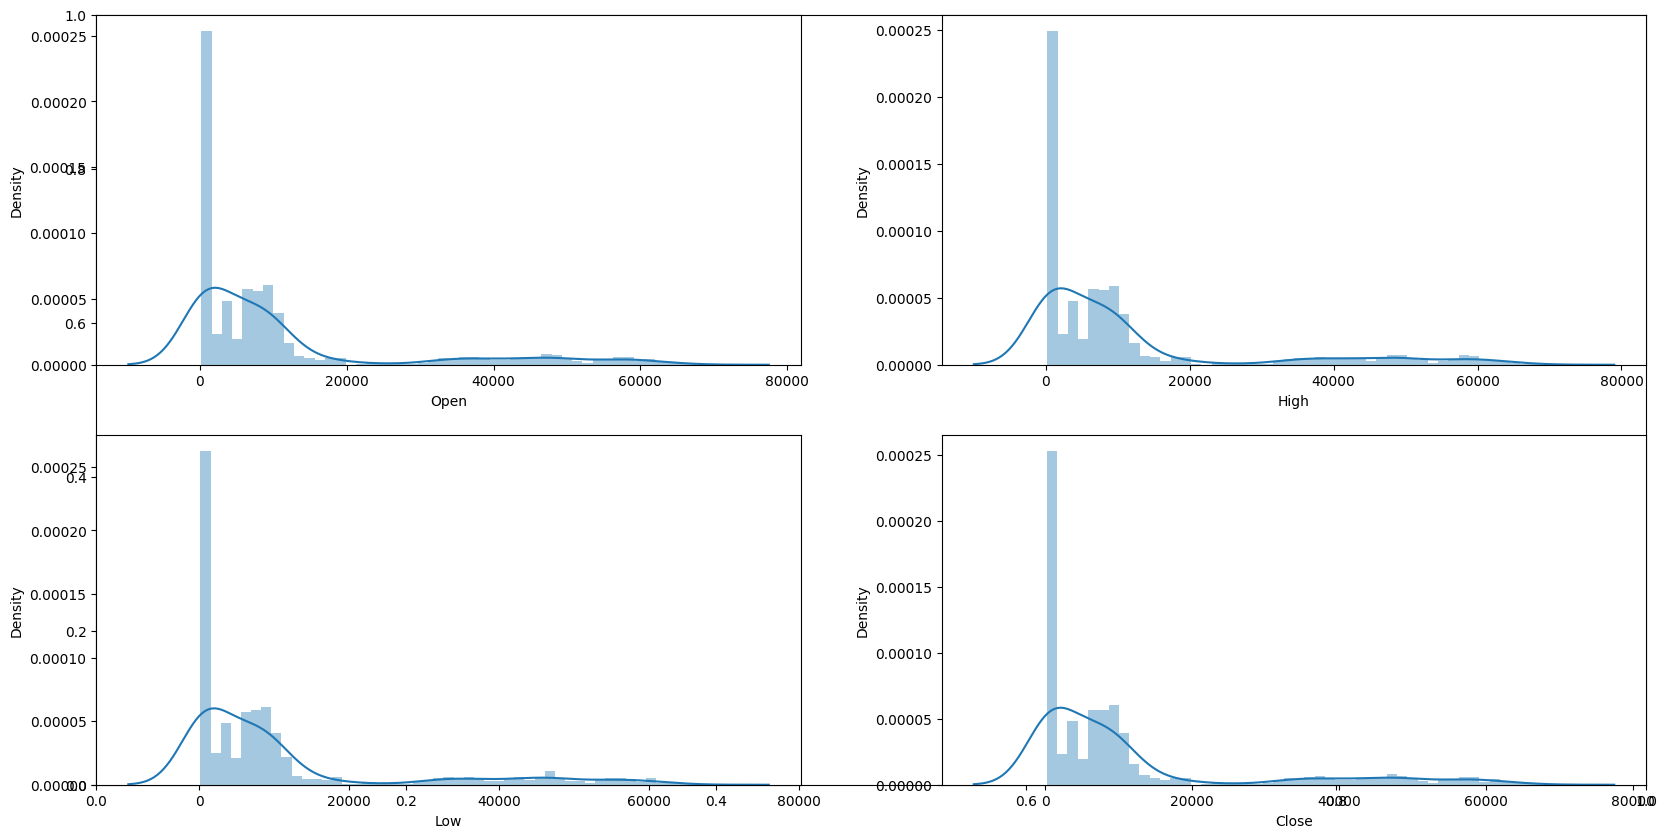

In [ ]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.distplot(df[col])
plt.show()



*   `plt.subplots(figsize=(20,10))`: Sets the figure size to 20x10 inches.

*   `for i, col in enumerate(features)`: Iterates over the feature columns ('Open', 'High', 'Low', 'Close').

*   `plt.subplot(2,2,i+1)`: Creates a 2x2 grid of subplots.

*   `sb.boxplot(df[col])`: Plots a boxplot for each feature column to visualize its distribution and outliers.
*   `plt.show()`: Displays the plots.


*   This code generates 4 boxplots for the 'Open', 'High', 'Low', and 'Close' columns.







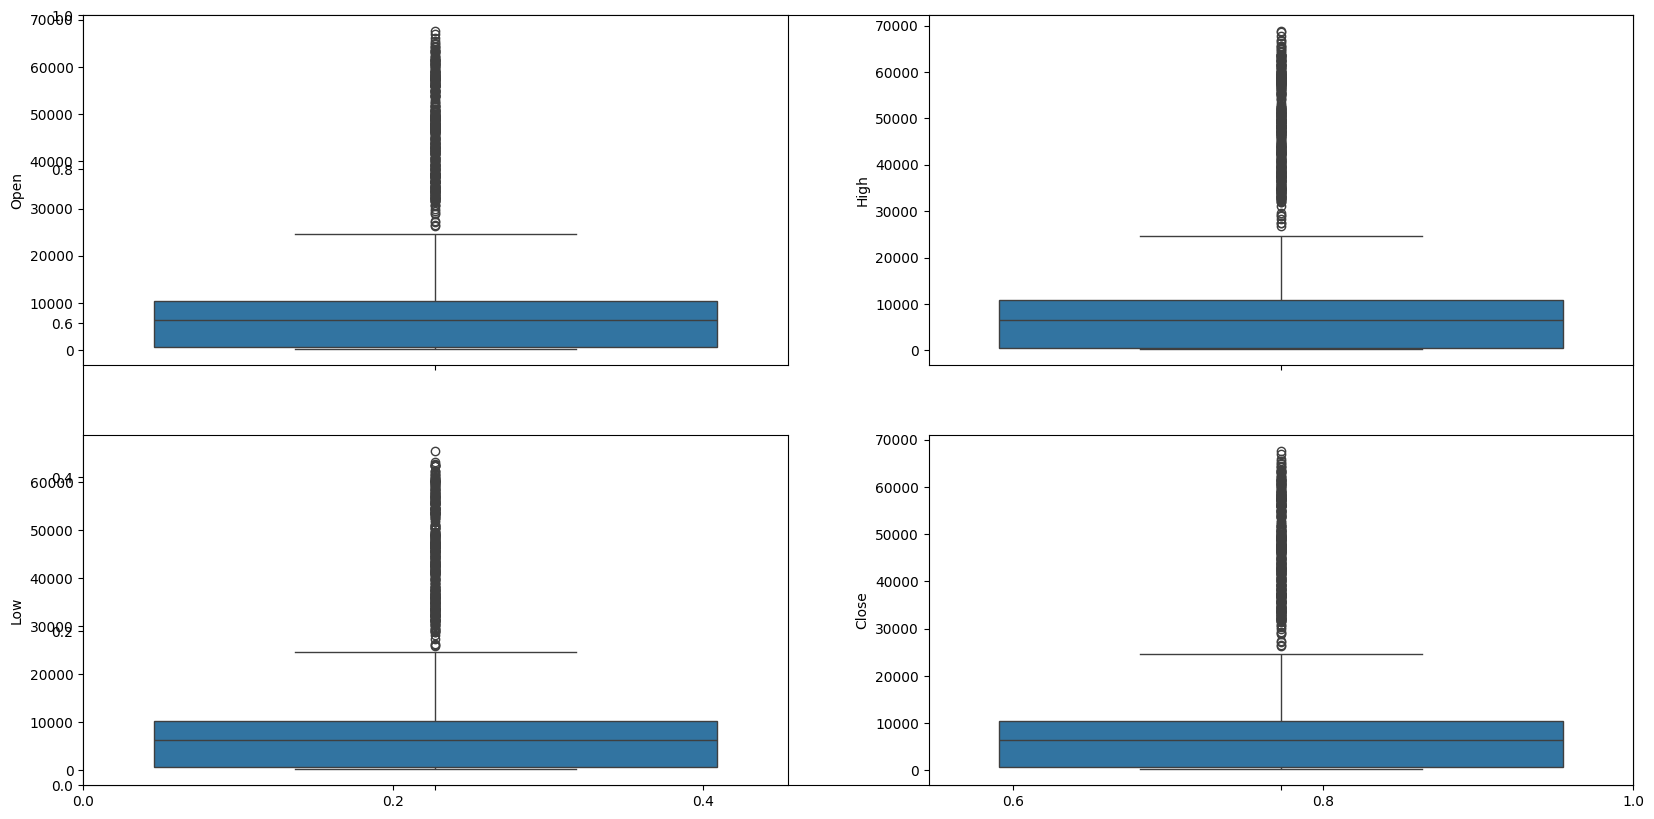

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sb.boxplot(df[col])
plt.show()

**Step 3: Feature Engineering**

Feature Engineering helps to derive some valuable features from the existing ones. These extra features sometimes help in increasing the performance of the model significantly and certainly help to gain deeper insights into the data.

1. **`splitted = df['Date'].str.split('-', expand=True)`**  
   - This line splits the values in the `Date` column by the `-` character. It separates the year, month, and day into different columns. The `expand=True` ensures that each split part is placed into its own new column, resulting in a DataFrame.

2. **`df['year'] = splitted[0].astype('int')`**  
   - This extracts the first part of the split result (the year) from `splitted` and converts it to an integer type using `astype('int')`. It then assigns this to a new column `year` in the original DataFrame.

3. **`df['month'] = splitted[1].astype('int')`**  
   - Similarly, this line extracts the second part (the month) and converts it to an integer, storing it in the new column `month`.

4. **`df['day'] = splitted[2].astype('int')`**  
   - This line does the same for the third part (the day), converting it to an integer and storing it in the `day` column.

5. **`df['Date'] = pd.to_datetime(df['Date'])`**  
   - This converts the original `Date` column from a string format to a proper pandas `datetime` object, making it easier to perform date-related operations (like filtering by date, extracting parts, etc.).

6. **`df.head()`**  
   - This displays the first few rows of the DataFrame, allowing you to quickly check the result of your operations.



In [ ]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()


,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21




 **`data_grouped = df.groupby('year').mean()`**
   - This groups the DataFrame `df` by the `year` column and calculates the mean of the other columns (`Open`, `High`, `Low`, `Close`, etc.) for each year. The result is a new DataFrame `data_grouped` where each row corresponds to a year, and each column is the mean value for that year.

**`plt.subplots(figsize=(20,10))`**
   - This creates a figure with subplots. The `figsize=(20, 10)` specifies the size of the entire figure (20 inches wide by 10 inches tall), which will be used for all the subplots created later.

**`for i, col in enumerate(['Open', 'High', 'Low', 'Close']):`**
   - This loop iterates over the list `['Open', 'High', 'Low', 'Close']`. `enumerate()` provides both the index (`i`) and the column name (`col`) for each iteration. The loop is used to create a subplot for each of these columns.

**`plt.subplot(2, 2, i+1)`**
   - This creates a subplot within a 2x2 grid (2 rows, 2 columns). The `i+1` specifies the position of the subplot in the grid (starting from 1). This line ensures that the bar plots will be placed correctly in the 2x2 grid.

**`data_grouped[col].plot.bar()`**
   - This plots a bar chart for the average values of the column `col` (one of `Open`, `High`, `Low`, or `Close`) from the `data_grouped` DataFrame. It creates a bar plot for each column in a separate subplot.

**`plt.show()`**
   - This displays the plots that have been created. After all the subplots are set up, `plt.show()` will render the figure with all the bar charts.


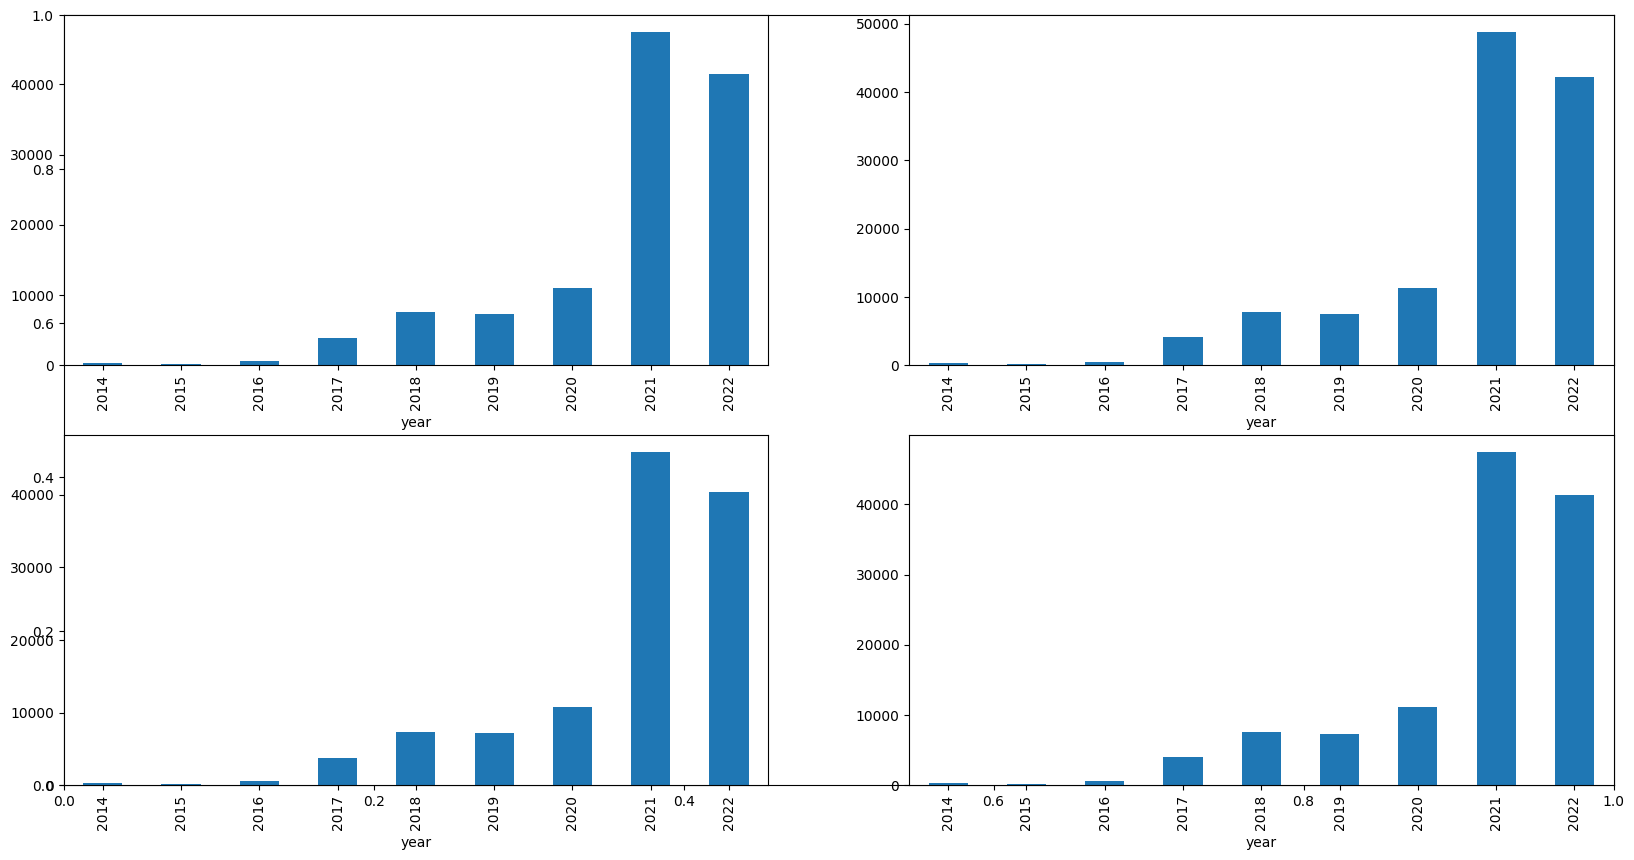

In [ ]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


This code is adding a new column `is_quarter_end` to your DataFrame `df`, which will indicate whether a given row corresponds to the end of a financial quarter (i.e., months that are multiples of 3 — March, June, September, and December).

 **`df['is_quarter_end'] = np.where(df['month']%3==0,1,0)`**  
   - `np.where()` is a vectorized way to apply a condition to a column. Here, you're checking if the `month` is a multiple of 3 (i.e., whether `month % 3 == 0`).
   - If the condition is true (i.e., the month is March, June, September, or December), the new column `is_quarter_end` is set to `1`.
   - If the condition is false, meaning the month is not a quarter-end month, the new column `is_quarter_end` is set to `0`.

 **`df.head()`**  
   - This shows the first few rows of the DataFrame, including the newly added `is_quarter_end` column. It will display `1` for rows where the month is March, June, September, or December, and `0` otherwise.



In [ ]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


This code adds three new columns to your DataFrame `df`, each performing different operations based on the values in existing columns.

**`df['open-close'] = df['Open'] - df['Close']`**  
   - This creates a new column, `open-close`, by subtracting the `Close` price from the `Open` price for each row.  
   - The result represents the price difference between the open and close of the day (e.g., if `Open` is higher than `Close`, this value will be positive, indicating a decrease in price during the day).

**`df['low-high'] = df['Low'] - df['High']`**  
   - This creates another new column, `low-high`, which represents the difference between the `Low` price and the `High` price for each row.
   - The `Low` price will always be less than or equal to the `High` price, so this will generally result in negative values (unless there's some anomaly in the data).

**`df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)`**  
   - `np.where()` here is used to create a new column `target` based on whether the `Close` price of the next row (using `.shift(-1)`, which shifts the data down by one row) is greater than the `Close` price of the current row.
   - If the `Close` price of the next day is greater than the current day's `Close`, `target` will be `1`, indicating an upward movement in price. Otherwise, it will be `0`, indicating no upward movement (or a downward movement).



In [ ]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

This code is generating a pie chart to show the distribution of the `target` column (which has values `0` and `1`) in your DataFrame `df`.

**`df['target'].value_counts().values`**  
   - This gets the count of unique values in the `target` column (`0` and `1`) using `value_counts()`. The `.values` part extracts the actual counts as a numpy array, which will be used as the values for the pie chart.
   - Essentially, this will give you how many `0`s and `1`s are in the `target` column.

**`plt.pie(..., labels=[0, 1], autopct='%1.1f%%')`**  
   - `plt.pie()` creates a pie chart.
   - The first argument is the list of values (i.e., the counts of `0` and `1` in the `target` column).
   - `labels=[0, 1]` labels the pie chart slices with `0` and `1`, corresponding to the two possible values in the `target` column.
   - `autopct='%1.1f%%'` specifies that the percentage values on the pie chart should be displayed with one decimal point (e.g., 60.5%).

**`plt.show()`**  
   - This displays the pie chart.

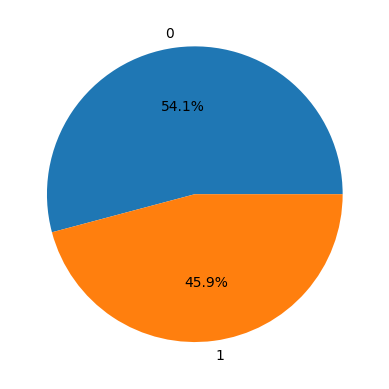

In [ ]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()



**`plt.figure(figsize=(10, 10))`**  
   - This sets up the figure size for the plot. The figure will be 10 inches wide by 10 inches tall, ensuring that the heatmap is large and easy to read.

**`sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)`**  
   - `df.corr()` calculates the correlation matrix for all the numeric columns in `df`. Each element in this matrix represents the correlation coefficient between two columns.
   - `df.corr() > 0.9` creates a boolean matrix where `True` represents a correlation greater than 0.9 and `False` represents a correlation less than or equal to 0.9.
   - `sb.heatmap(...)` creates a heatmap from this boolean matrix. The heatmap will show the relationships between features, with darker colors representing `True` values (correlations greater than 0.9).
   - `annot=True` ensures that the actual values of the correlations (True/False) will be annotated directly on the heatmap.
   - `cbar=False` disables the color bar (because we’re visualizing boolean values, a color bar isn’t necessary).


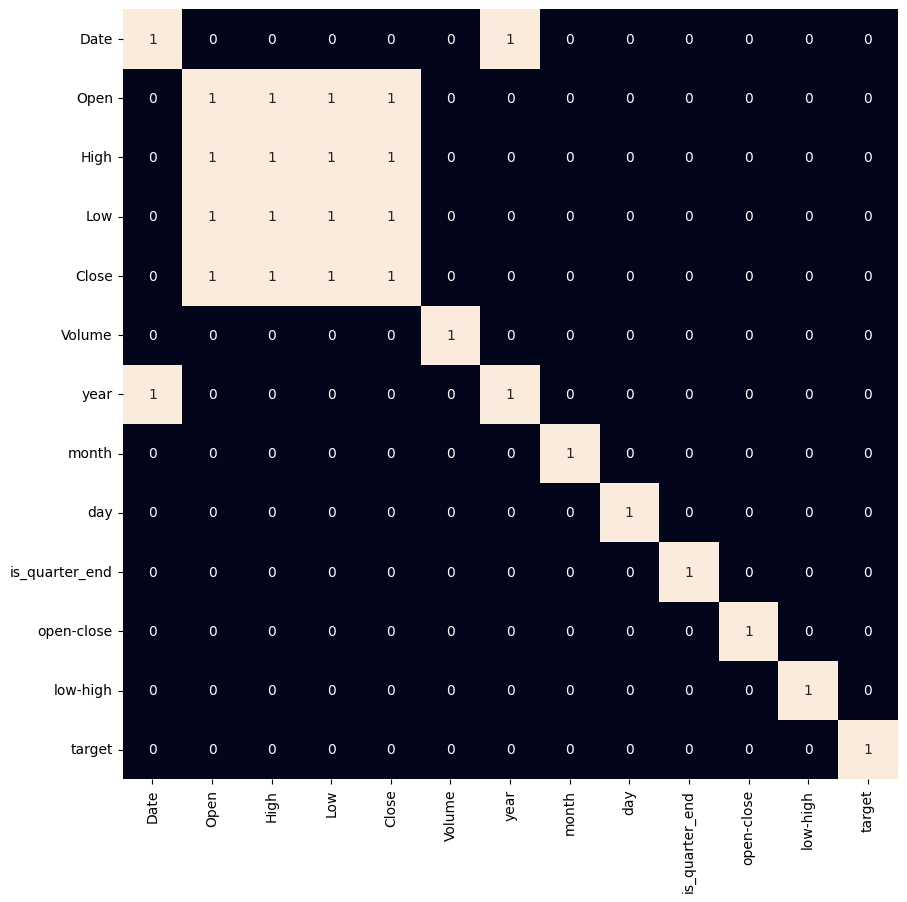

In [ ]:
plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()




1. **`features = df[['open-close', 'low-high', 'is_quarter_end']]`**  
   - This line selects the columns `open-close`, `low-high`, and `is_quarter_end` from the DataFrame `df` as your input features (`X`).

2. **`target = df['target']`**  
   - This line assigns the target variable (`target`) from the `target` column in your DataFrame, which will be used for training and validation.

3. **`scaler = StandardScaler()`**  
   - Here, you're initializing a `StandardScaler` object from scikit-learn, which will standardize the features (i.e., make them have a mean of 0 and standard deviation of 1).

4. **`features = scaler.fit_transform(features)`**  
   - This line scales the `features` by fitting the `StandardScaler` to the data and transforming the values accordingly. This ensures the model works better by standardizing the feature values.

5. **`X_train, X_valid, Y_train, Y_valid = features[:int(len(features)*0.7)], features[int(len(features)*0.7):], target[:int(len(features)*0.7)], target[int(len(features)*0.7):]`**  
   - This slices the dataset manually into training and validation sets:
     - The first 70% of `features` and `target` are assigned to `X_train` and `Y_train` (for training).
     - The remaining 30% of `features` and `target` are assigned to `X_valid` and `Y_valid` (for validation).



In [ ]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)
#We do not use train test split, rather use the first 70% data to train and last 30% to test
X_train, X_valid, Y_train, Y_valid = features[:int(len(features)*0.7)], features[int(len(features)*0.7):], target[:int(len(features)*0.7)], target[int(len(features)*0.7):]



**Step 4: Model Development and Evaluation**

Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

In [ ]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5351397573619796
Validation Accuracy :  0.5170956321701721

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4620811287477955
Validation Accuracy :  0.4876542333891013

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

Among the three models, we have trained XGBClassifier has the highest performance but it is pruned to overfitting as the difference between the training and the validation accuracy is too high. But in the case of the Logistic Regression, this is not the case.

**Step 5: Data Validation**

Plot a confusion matrix for the validation data.

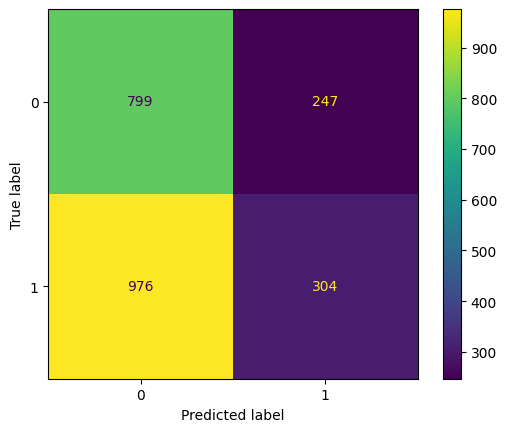

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()


**Conclusion:**

We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.